In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
data_file_path = r'C:/Users/Hp/Downloads/tweets.csv'
df = pd.read_csv(data_file_path)
print(df.head())

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  


In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None


In [5]:
print("\nMissing values before cleanup:")
print(df.isnull().sum())


Missing values before cleanup:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [6]:
tweets_df=df
tweets_df['location'].fillna('Unknown', inplace=True)
df.dropna(subset=['keyword', 'text'], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9724\2952784586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweets_df['location'].fillna('Unknown', inplace=True)


In [7]:
# Cleaning the text data by removing special characters and numbers
def clean_text(text):
    # Remove URLs and mentions but keep words in any language
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    # Keep alphabets from any language, numbers and spaces; remove everything else
    text = re.sub(r'[^A-Za-z0-9가-힣\s]', '', text)  # This includes Korean characters
    return text.lower()  # Convert to lowercase to maintain consistency
    
# Dropping the 'id' column from the dataset
tweets_df = tweets_df.drop(columns=['id'])

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

keyword        location                                               text  \
0  ablaze         Unknown  Communal violence in Bhainsa, Telangana. "Ston...   
1  ablaze         Unknown  Telangana: Section 144 has been imposed in Bha...   
2  ablaze   New York City  Arsonist sets cars ablaze at dealership https:...   
3  ablaze  Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4  ablaze         Unknown  "Lord Jesus, your love brings freedom and pard...   

   target                                       cleaned_text  
0       1  communal violence in bhainsa telangana stones ...  
1       1  telangana section 144 has been imposed in bhai...  
2       1           arsonist sets cars ablaze at dealership   
3       1          arsonist sets cars ablaze at dealership    
4       0  lord jesus your love brings freedom and pardon...

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [9]:
tweets_df['tokens'] = tweets_df['cleaned_text'].apply(word_tokenize)

In [10]:
# Display the first few rows to check tokenization
tweets_df[['cleaned_text', 'tokens']].head()

cleaned_text  \
0  communal violence in bhainsa telangana stones ...   
1  telangana section 144 has been imposed in bhai...   
2           arsonist sets cars ablaze at dealership    
3          arsonist sets cars ablaze at dealership     
4  lord jesus your love brings freedom and pardon...   

                                              tokens  
0  [communal, violence, in, bhainsa, telangana, s...  
1  [telangana, section, 144, has, been, imposed, ...  
2     [arsonist, sets, cars, ablaze, at, dealership]  
3     [arsonist, sets, cars, ablaze, at, dealership]  
4  [lord, jesus, your, love, brings, freedom, and...

In [11]:

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load stopwords set
stopwords = set(stopwords.words('english'))

# Removing stopwords from the tokenized data
tweets_df['tokens'] = tweets_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stopwords])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Checking a few examples to ensure stopwords are removed
print(tweets_df['tokens'].head())

0    [communal, violence, bhainsa, telangana, stone...
1    [telangana, section, 144, imposed, bhainsa, ja...
2           [arsonist, sets, cars, ablaze, dealership]
3           [arsonist, sets, cars, ablaze, dealership]
4    [lord, jesus, love, brings, freedom, pardon, f...
Name: tokens, dtype: object


In [13]:
stemmer = PorterStemmer()
# Apply stemming to each token
tweets_df['stemmed'] = tweets_df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
# Check some examples
print(tweets_df[['tokens', 'stemmed']].head())


                                              tokens  \
0  [communal, violence, bhainsa, telangana, stone...   
1  [telangana, section, 144, imposed, bhainsa, ja...   
2         [arsonist, sets, cars, ablaze, dealership]   
3         [arsonist, sets, cars, ablaze, dealership]   
4  [lord, jesus, love, brings, freedom, pardon, f...   

                                             stemmed  
0  [commun, violenc, bhainsa, telangana, stone, p...  
1  [telangana, section, 144, impos, bhainsa, janu...  
2            [arsonist, set, car, ablaz, dealership]  
3            [arsonist, set, car, ablaz, dealership]  
4  [lord, jesu, love, bring, freedom, pardon, fil...  


C:\Users\Hp\AppData\Local\Temp\ipykernel_9724\1940034949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


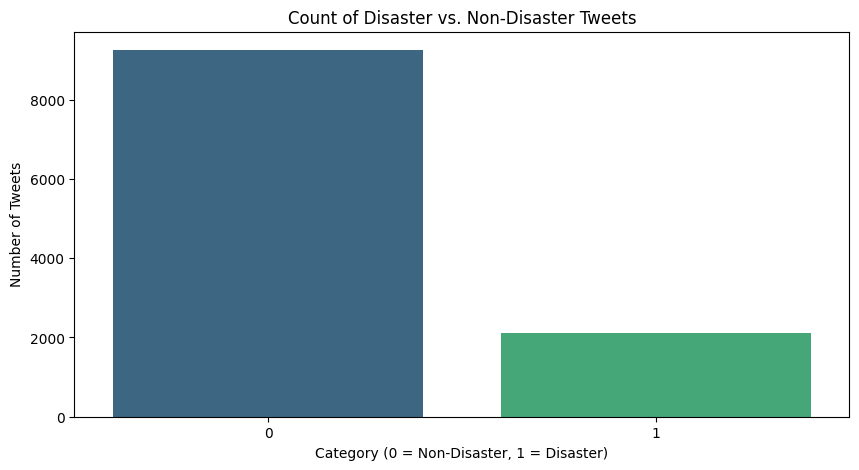

In [14]:
# Plot the number of disaster and non-disaster tweets
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Hp\AppData\Local\Temp\ipykernel_9724\2101260466.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


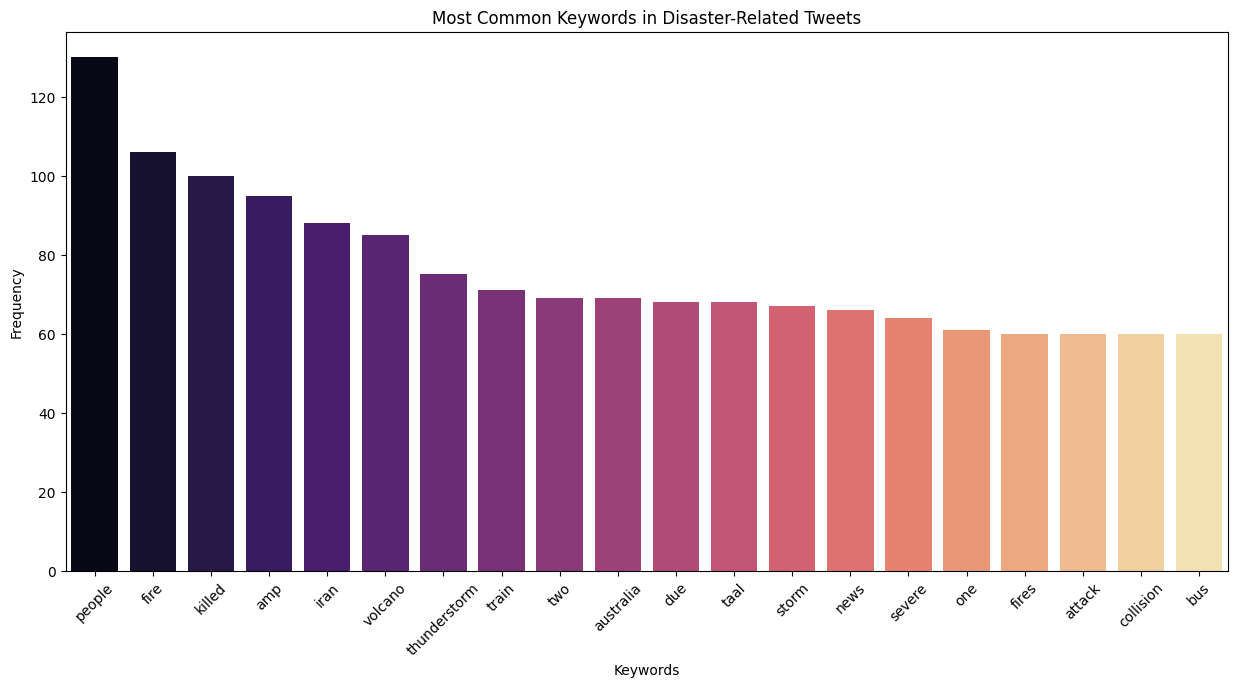

In [15]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = tweets_df[tweets_df['target'] == 1]['cleaned_text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [16]:
tweets_df.head()

keyword        location                                               text  \
0  ablaze         Unknown  Communal violence in Bhainsa, Telangana. "Ston...   
1  ablaze         Unknown  Telangana: Section 144 has been imposed in Bha...   
2  ablaze   New York City  Arsonist sets cars ablaze at dealership https:...   
3  ablaze  Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4  ablaze         Unknown  "Lord Jesus, your love brings freedom and pard...   

   target                                       cleaned_text  \
0       1  communal violence in bhainsa telangana stones ...   
1       1  telangana section 144 has been imposed in bhai...   
2       1           arsonist sets cars ablaze at dealership    
3       1          arsonist sets cars ablaze at dealership     
4       0  lord jesus your love brings freedom and pardon...   

                                              tokens  \
0  [communal, violence, bhainsa, telangana, stone...   
1  [telangana, section, 144, imposed, bhainsa, ja...   
2         [arsonist, sets, cars, ablaze, dealership]   
3         [arsonist, sets, cars, ablaze, dealership]   
4  [lord, jesus, love, brings, freedom, pardon, f...   

                                             stemmed  
0  [commun, violenc, bhainsa, telangana, stone, p...  
1  [telangana, section, 144, impos, bhainsa, janu...  
2            [arsonist, set, car, ablaz, dealership]  
3            [arsonist, set, car, ablaz, dealership]  
4  [lord, jesu, love, bring, freedom, pardon, fil...

Original class distribution:


Resampled class distribution:


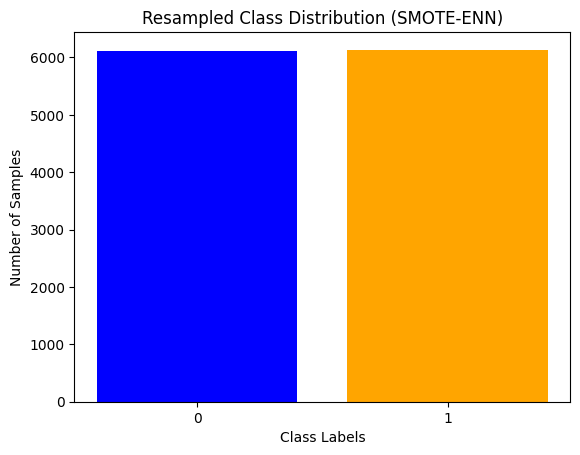

Original class distribution: Counter({0: 6448, 1: 1511})
Resampled class distribution: Counter({1: 6134, 0: 6104})


In [17]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Prepare Features and Target
X = tweets_df['text']  # Text data (features)
y = tweets_df['target']  # Target column

# Step 2: Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # You can adjust 'max_features' based on your needs
X_tfidf = tfidf.fit_transform(X)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 4: Visualize the original class distribution
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.bar(counter.keys(), counter.values(), color=['blue', 'orange'])
    plt.title(title)
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Samples')
    plt.xticks([0, 1])
    plt.show()

print("Original class distribution:")
plot_class_distribution(y_train, 'Original Class Distribution')

# Step 5: Apply SMOTE-ENN on the training data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Step 6: Visualize the resampled class distribution
print("Resampled class distribution:")
plot_class_distribution(y_resampled, 'Resampled Class Distribution (SMOTE-ENN)')

# Optional: Print exact numbers for further confirmation
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")
